## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
PATH = "/content/drive/MyDrive/Class Stuff/Fall23/NLP/Final Project/Data"

In [3]:
train = pd.read_csv(os.path.join(PATH,"train.csv"))
train

,sentence,label
0,the reason for the lack of any actual levellin...,1
1,for the same reason they protest lightly or no...,0
2,but the new england journal of medicine study ...,0
3,the biden administration predict nearly number...,0
4,so now there be a movementa movement within go...,0
...,...,...
745,but this week bfnumber surpass it,0
746,china leader may be seek to avoid the past mis...,0
747,projection far indicate that the rate will be ...,0
748,they use code to advance their agenda while co...,0


## Visualizing the number of phrases that belong to a specific category

In [4]:
value_counts = train['label'].value_counts()
value_counts.index = ['OBJ', 'SUBJ']

total = value_counts.sum()
percentage_OBJ = int((int(value_counts.OBJ)/int(total))*100)
percentage_SUBJ = 100-percentage_OBJ

print(f"Total number of phrases: {total}")
print(f"Percentage split of objective phrases and subjective phrases is {percentage_OBJ}:{percentage_SUBJ}")

Total number of phrases: 750
Percentage split of objective phrases and subjective phrases is 61:39


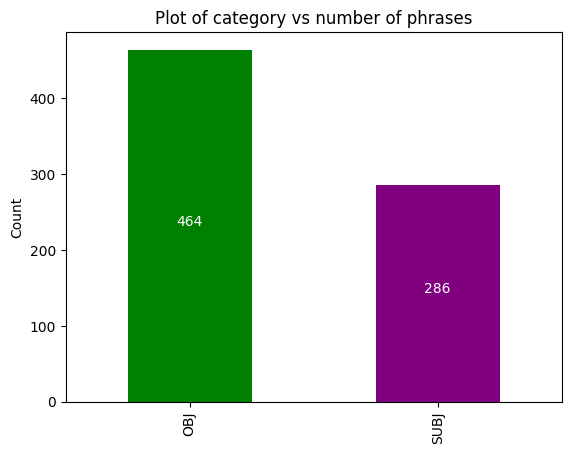

In [5]:
ax = value_counts.plot(kind='bar', color=['green', 'purple'])
plt.title('Plot of category vs number of phrases')
plt.ylabel('Count')

for i, v in enumerate(value_counts):
  ax.text(i, v - (v//2), str(v), color='white', ha='center')

plt.show()

## Determining the number of unique words

In [6]:
all_sentences = ' '.join(train['sentence'].astype(str))

words = pd.Series(all_sentences.split())

word_counts = words.value_counts()
top_words = word_counts.head(50)

print(f"Number of unique words: {len(word_counts)}")

Number of unique words: 3191


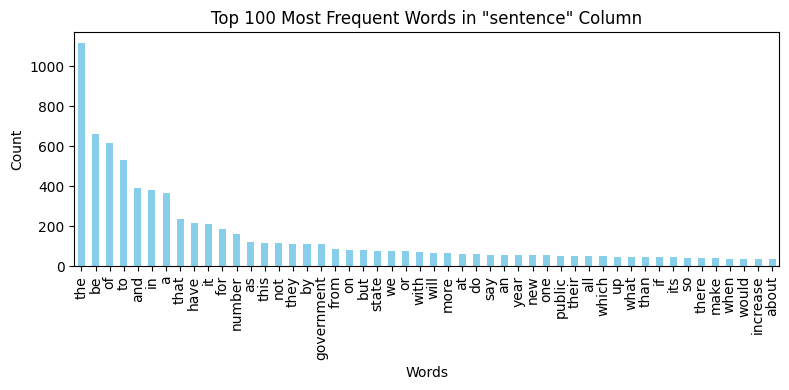

In [7]:
plt.figure(figsize=(8, 4))
top_words.plot(kind='bar', rot=90, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 100 Most Frequent Words in "sentence" Column')
plt.tight_layout()

plt.show()

## Visualizing phrase length

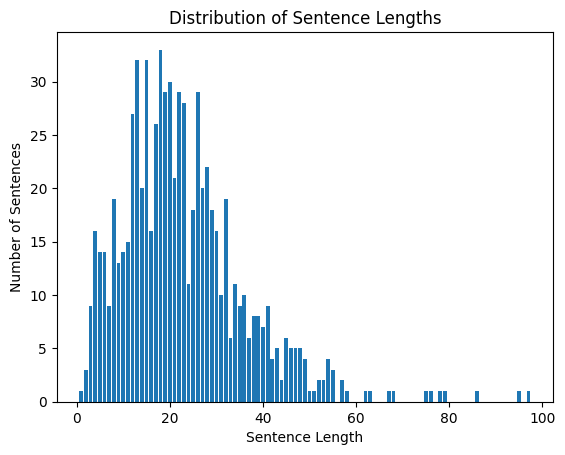

Smallest Sentence Length: 1 words
Largest Sentence Length: 97 words
Average Sentence Length: 22.91 words


In [8]:
train['sentence_length'] = train['sentence'].astype(str).apply(lambda x: len(x.split()))
min_length = train['sentence_length'].min()
max_length = train['sentence_length'].max()

average_length = train['sentence_length'].mean()

sentence_lengths = train['sentence_length'].value_counts().sort_index()

plt.bar(sentence_lengths.index, sentence_lengths.values)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentence Lengths')
plt.show()

print(f"Smallest Sentence Length: {min_length} words")
print(f"Largest Sentence Length: {max_length} words")
print(f"Average Sentence Length: {average_length:.2f} words")